In [42]:
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os
import numpy as np
import time
from PIL import Image
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True
from collections import defaultdict
import cv2
import pdb
IMG_SIZE = (224,224)
import pandas as pd
from torchvision import models
from torchsummary import summary
import copy
import matplotlib.pyplot as plt
import torch
from skimage import io, transform
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torch.utils.data as data_utils
import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F 
import numpy as np


In [44]:
class Emotion_Dataset(Dataset):
    """Emotion dataset."""

    def __init__(self, csv_file, root_dir, transform=None, data_aug=None,whole_time_scale=None,three_sec_ts=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.data_aug = data_aug
        self.three_sec_ts = three_sec_ts
        self.whole_time_scale=whole_time_scale

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        if self.whole_time_scale:
            #img_name = os.path.join(self.data_frame.iloc[idx, 22],
            #                        self.data_frame.iloc[idx, 0])

            ses_dir = self.data_frame.iloc[idx, 22].split('/')[-2]
            #i_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/with_noise_cleanup/"
            i_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/without_noise_cleanup/"
            img_p = i_path + ses_dir + "/"
            index_ = self.data_frame.iloc[idx, 0].split('_Same_ColorBAR.png')[0].split('_')
            index_[4] = "0"
            aa = "_".join(index_)
            #pdb.set_trace()
            img_f_name = aa + "_Whole_Length_Same_ColorBAR.png"



            #img_name = img_p + self.data_frame.iloc[idx, 0]
            img_name = img_p + img_f_name

        if self.three_sec_ts:
            img_name = os.path.join(self.data_frame.iloc[idx, 22],
                                self.data_frame.iloc[idx, 0])
        
        #image = io.imread(img_name)
        image = Image.open(img_name)
        image = image.convert('RGB')
        #image.save('1.png')
        #import pdb
        #pdb.set_trace()
        image = image.crop((20,190,380,280))
        #image = image.crop((20,250,380,280))
        #image1.save('2.png')
        #print('width heigth', image.size)

        #tr = transforms.ToTensor()
        #image = tr(image)
        #landmarks = self.data_frame.iloc[idx, 21]
        #landmarks = np.array([landmarks])
        #landmarks = landmarks.astype('float').reshape(-1, 2)
        emotion = self.data_frame.iloc[idx,21]
        emotion = np.array([emotion])
        emotion = emotion.astype('int').reshape((1))
        
        

        if self.data_aug:
            ### For Cropping    
            execute_command_prob=int(np.random.choice([0,1],1,p=[0.9,0.1])[0])
            #print(execute_command_prob)
            #execute_command_prob = 0
            if execute_command_prob:
                com = transforms.Compose([
                    transforms.Resize((200,300)),       
                    transforms.RandomCrop((180,300), padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),
                    transforms.Resize((200,300))
                ])
                image = com(image)

            ### For Rotation
            execute_command_prob=int(np.random.choice([0,1],1,p=[0.5,0.5])[0])
            #print(execute_command_prob)
            #execute_command_prob = 1
            if execute_command_prob:
                com = transforms.Compose([
                transforms.Resize((200,300)),  
                transforms.RandomRotation(10, resample=Image.BILINEAR)
                ])
                image = com(image)
                #transforms.RandomCrop((180,200), padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),
                #transforms.Resize((200,300)),
                
                
        sample = {'image': image, 'emotion': emotion}    
        if self.transform:
            sample['image'] = self.transform(sample['image'])

        return sample
    

In [45]:
def show_emotion_audio(image, emotion):
    """Show image with landmarks"""
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.imshow(image)
    #plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.title(emotion)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [46]:
for i in range(1):
    aa = np.random.choice([0,1],1,p=[0.8,0.2])[0]
    print(aa)

1


length 8000
0 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DB50B790> (1,)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


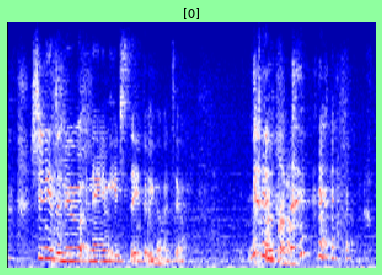

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


1 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D177F0D0> (1,)


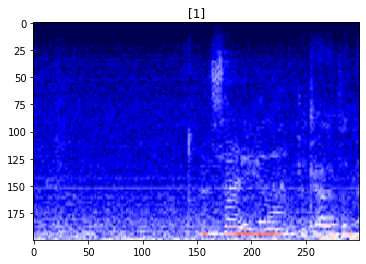

2 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DB44E550> (1,)


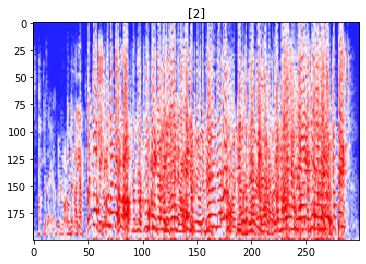

3 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DBBD0790> (1,)


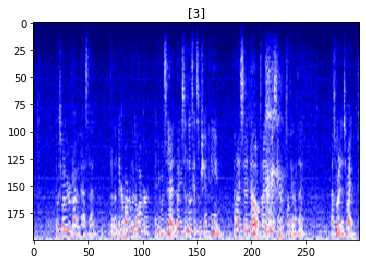

4 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DBFE6DD0> (1,)


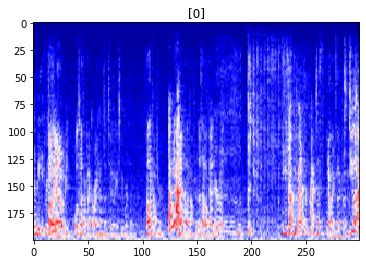

5 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DDBAEB90> (1,)


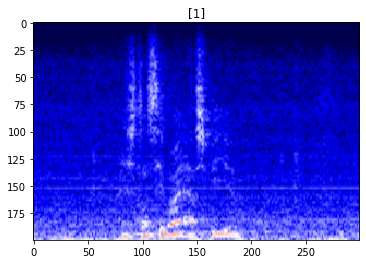

6 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DE769D10> (1,)


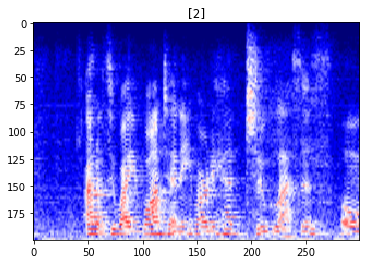

7 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DDE10A90> (1,)


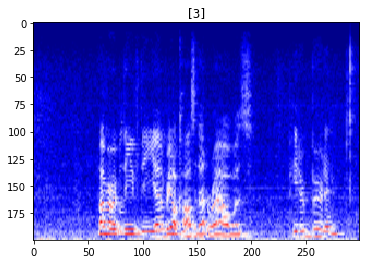

8 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DD7B9810> (1,)


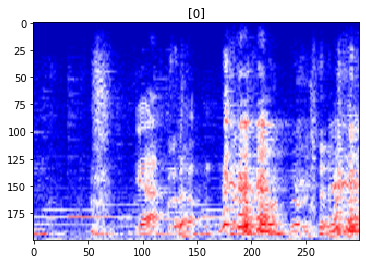

9 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DE75C410> (1,)


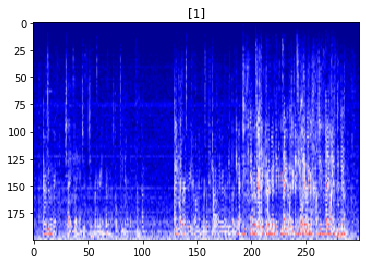

10 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DE848B10> (1,)


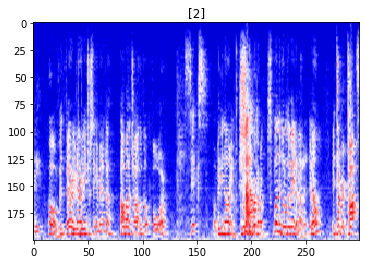

11 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DC2F8FD0> (1,)


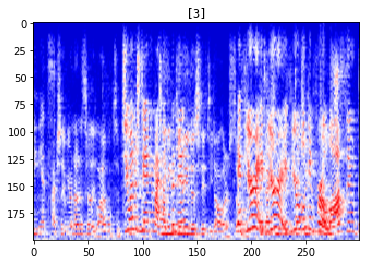

12 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DBA56950> (1,)


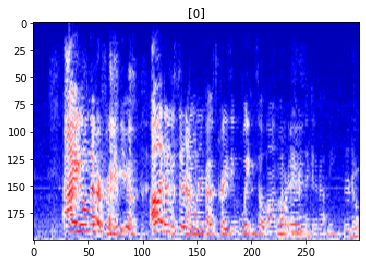

13 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DC2F8990> (1,)


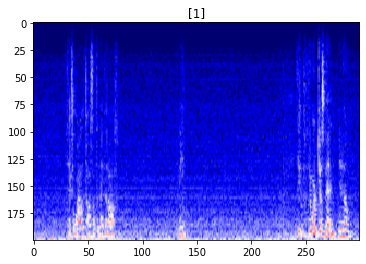

14 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D172B250> (1,)


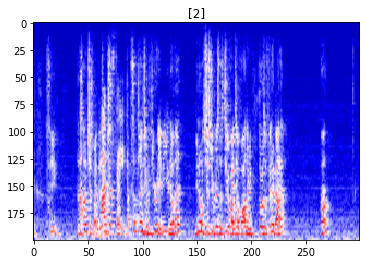

15 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D16FEC50> (1,)


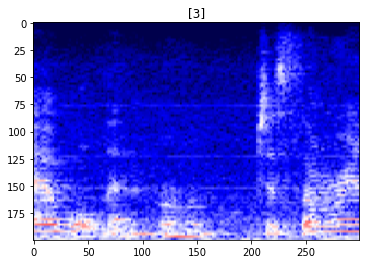

16 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D165AB50> (1,)


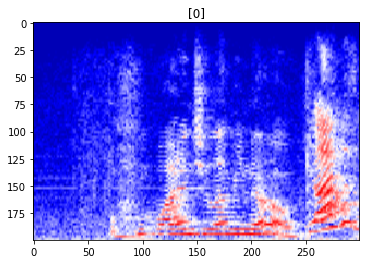

17 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D1683710> (1,)


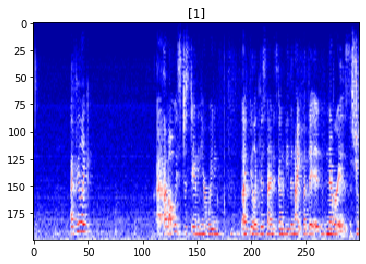

18 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D15CCDD0> (1,)


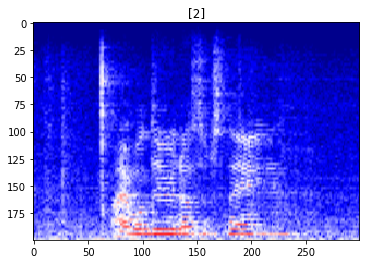

19 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D162C050> (1,)


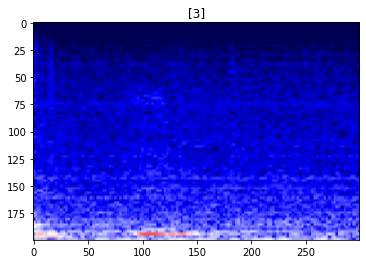

20 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01D16EC890> (1,)


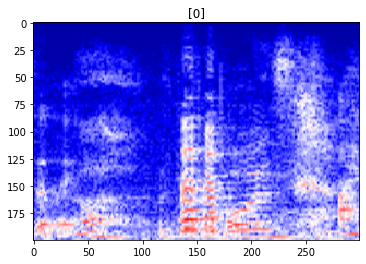

21 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DD959ED0> (1,)


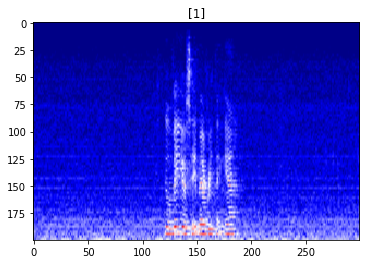

22 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DC384810> (1,)


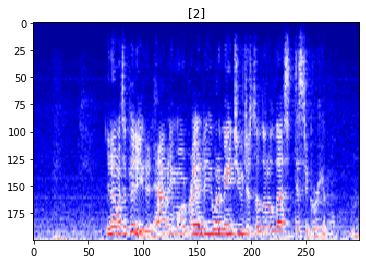

23 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DDCE76D0> (1,)


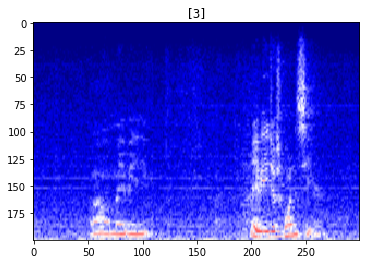

24 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DE7CCCD0> (1,)


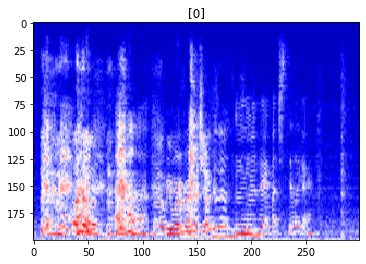

25 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DBAB8C10> (1,)


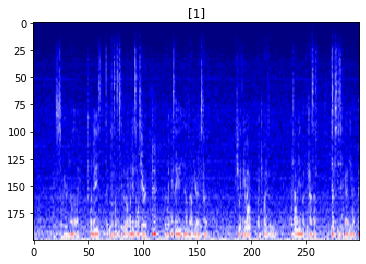

26 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DB53ACD0> (1,)


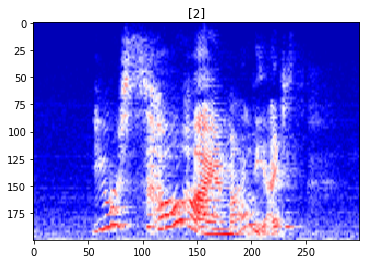

27 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DBF50C90> (1,)


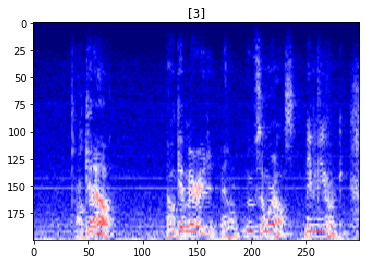

28 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DB489F50> (1,)


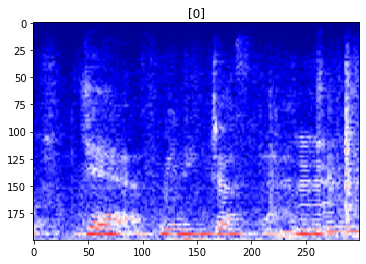

29 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DE7634D0> (1,)


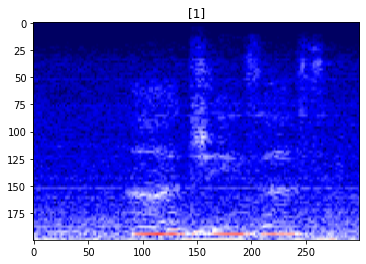

30 <PIL.Image.Image image mode=RGB size=300x200 at 0x7F01DBA6B750> (1,)


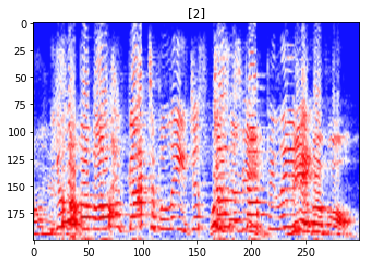

In [47]:
composed = transforms.Compose([
                                    #transforms.RandomCrop((395,110), padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),
                                    #transforms.CenterCrop((200,300)),
                                    #transforms.RandomRotation(10, resample=Image.BILINEAR),
                                    #transforms.Resize((200,300)),
                                    
                                    #transforms.RandomCrop((180,200), padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),
                                    transforms.Resize((200,300)),
                                    #transforms.ColorJitter(hue=.05, saturation=.05),
                                    #transforms.RandomRotation(10, resample=Image.BILINEAR),
                                    #transforms.ToTensor(),
                                    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              
                              ])
root_dir = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/without_noise_cleanup/"
emotion_dataset = Emotion_Dataset(csv_file=root_dir + 'input_data.csv',
                                    root_dir=root_dir, transform=composed, data_aug=0, whole_time_scale=1)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
fig.figsize=(2,3)
print("length",len(emotion_dataset))
for i in range(len(emotion_dataset)):
    sample = emotion_dataset[i]

    print(i, sample['image'], sample['emotion'].shape)
    
    #ax = plt.subplot(1, 30, i + 1)
    plt.figsize=(2,3)
    ax = fig.add_subplot()
    #ax.axis('off')
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_emotion_audio(**sample)

    if i == 30:
        plt.show()
        break


In [48]:
'''
composed = transforms.Compose([
                                    transforms.Resize((200,300)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              
                              ])

composed = transforms.Compose([
                                    transforms.RandomCrop((200,250), padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),
                                    transforms.Resize((200,300)),
                                    
                                    transforms.ColorJitter(hue=.05, saturation=.05),
                                    transforms.RandomRotation(20, resample=Image.BILINEAR),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              
                              ])
'''

"\ncomposed = transforms.Compose([\n                                    transforms.Resize((200,300)),\n                                    transforms.ToTensor(),\n                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n                              \n                              ])\n\ncomposed = transforms.Compose([\n                                    transforms.RandomCrop((200,250), padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),\n                                    transforms.Resize((200,300)),\n                                    \n                                    transforms.ColorJitter(hue=.05, saturation=.05),\n                                    transforms.RandomRotation(20, resample=Image.BILINEAR),\n                                    transforms.ToTensor(),\n                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n                           

In [49]:
composed = transforms.Compose([
                                    
                                    transforms.Resize((200,300)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              
                              ])
root_dir = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/without_noise_cleanup/"
emotion_dataset = Emotion_Dataset(csv_file=root_dir + 'input_data.csv',
                                    root_dir=root_dir, transform=composed, data_aug=1)

composed = transforms.Compose([
                                    
                                    transforms.Resize((200,300)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              
                              ])
root_dir = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/without_noise_cleanup/"
emotion_dataset_whole = Emotion_Dataset(csv_file=root_dir + 'input_data_TRAIN.csv',
                                    root_dir=root_dir, transform=composed, data_aug=0, whole_time_scale=1,three_sec_ts=0)

emotion_dataset_3_sec = Emotion_Dataset(csv_file=root_dir + 'input_data_TRAIN.csv',
                                    root_dir=root_dir, transform=composed, data_aug=0, whole_time_scale=0,three_sec_ts=1)



In [54]:
for i in range(len(emotion_dataset_3_sec)):
    sample = emotion_dataset_3_sec[i]

    print(i, sample['image'].shape, sample['emotion'])

    if i == 3:
        break

0 torch.Size([3, 200, 300]) [0]
1 torch.Size([3, 200, 300]) [1]
2 torch.Size([3, 200, 300]) [2]
3 torch.Size([3, 200, 300]) [3]


In [56]:
#total_images = len(emotion_dataset)
#test_data_images = np.int(total_images*0.2)
#train_data_images = total_images - test_data_images
#print("Train image count",train_data_images)
#print("Test image count",test_data_images)

loader_train = DataLoader(
                           torch.utils.data.ConcatDataset([emotion_dataset_whole, emotion_dataset_3_sec]),
                           batch_size=64,
                           shuffle=True
)

#loader_val = DataLoader(emotion_dataset, batch_size=64, sampler=sampler.SubsetRandomSampler(range(train_data_images, train_data_images+test_data_images)))

composed = transforms.Compose([
                                    transforms.Resize((200,300)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              
                              ])
root_dir = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/4_EMOTIONS/cb_removed/without_noise_cleanup/"
emotion_dataset_val = Emotion_Dataset(csv_file=root_dir + 'input_data_TEST.csv',
                                    root_dir=root_dir, transform=composed, data_aug=0,whole_time_scale=0,three_sec_ts=1)
#loader_val = DataLoader(emotion_dataset_val, batch_size=64, sampler=sampler.SubsetRandomSampler(range(train_data_images, train_data_images+test_data_images)))
loader_val = DataLoader(emotion_dataset_val, batch_size=64)


print("Train Data Points", len(loader_train.dataset))
print("Test Data Points", len(loader_val.dataset))

Train Data Points 12800
Test Data Points 1600


In [57]:
for t, x in enumerate(loader_val):
    print(t, x['image'].shape, x['emotion'].shape)
    #print(x,y)
    if t == 3:
        break
    

0 torch.Size([64, 3, 200, 300]) torch.Size([64, 1])
1 torch.Size([64, 3, 200, 300]) torch.Size([64, 1])
2 torch.Size([64, 3, 200, 300]) torch.Size([64, 1])
3 torch.Size([64, 3, 200, 300]) torch.Size([64, 1])


In [58]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [59]:
print_every = 50

In [60]:
def check_train_accuracy11(loader, model):
    #if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    #else:
    #    print('Checking accuracy on test set')
    print('Checking accuracy on TRAIN set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for da in loader:
            #pdb.set_trace()
            #x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            #y = y.to(device=device, dtype=torch.long)
            x = da['image']
            y = da['emotion']
            y = y.reshape(y.shape[0])
            x = x.to(device)
            y = y.to(device)
            #pdb.set_trace()
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return acc


def check_train_accuracy(loader, model):
    #if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    #else:
    #    print('Checking accuracy on test set')
    print('Checking accuracy on TRAIN set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            #pdb.set_trace()
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            #pdb.set_trace()
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return acc
    
def check_accuracy_part34(loader, model):
    #if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    #else:
    #    print('Checking accuracy on test set')
    print('Checking accuracy on VAL set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for da in loader:
            #pdb.set_trace()
            x = da['image']
            y = da['emotion']
            y = y.reshape(y.shape[0])
            x = x.to(device)
            y = y.to(device)
            #x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            #y = y.to(device=device, dtype=torch.long)
            #pdb.set_trace()
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return acc
    
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    acc = 0
    
    per_epoch_train_accuracy_list = []
    per_epoch_test_accuracy_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    loss_list = []
    best_model = model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, da in enumerate(loader_train):
            #import pdb
            #pdb.set_trace()
            model.train()  # put model to training mode
            x = da['image']
            y = da['emotion']
            y = y.reshape(y.shape[0])
            x = x.to(device)
            y = y.to(device)
            
            #x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            #y = y.to(device=device, dtype=torch.long)
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            
            loss = F.cross_entropy(scores, y)
            loss_list.append(loss.item())
            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()
            #pdb.set_trace()
            #print("IN ITERATION", t)
            if t % print_every == 0:
                print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
                #pdb.set_trace()
                xx = x.cpu().data.numpy()
                yy = y.cpu().data.numpy()
                tt_data = []
                for i in range(len(xx)):
                  #ind = np.where(keys_array==Y[i]) 
                  tt_data.append([xx[i], yy[i]])
                
                train_d = DataLoader(tt_data, batch_size = 1)
                
                train_acc = check_train_accuracy(train_d, model)
                train_accuracy_list.append(train_acc)
                test_acc = check_accuracy_part34(loader_val, model)
                test_accuracy_list.append(test_acc)
                if test_acc > acc:
                  acc = test_acc
                  best_model = copy.deepcopy(model)
                  print("Saving best model in iteration")
                  torch.save(best_model, "best_model_RNN_without_noise_cleanup_3sec_Time_Scale_20_epochs_WD_01")
                print()
        
        e_test_accuracy = check_accuracy_part34(loader_val, model) 
        if acc < e_test_accuracy:
                  acc = e_test_accuracy
                  best_model = copy.deepcopy(model)
                  print("Saving best model from epoch")
                  torch.save(best_model, "best_model_RNN_without_noise_cleanup_3sec_Time_Scale_20_epochs_WD_01")
                  #print()
        per_epoch_test_accuracy_list.append(e_test_accuracy)     
        e_train_accuracy = check_train_accuracy11(loader_train, model)        
        per_epoch_train_accuracy_list.append(e_train_accuracy)     
    return best_model, acc, train_accuracy_list, test_accuracy_list, per_epoch_train_accuracy_list, per_epoch_test_accuracy_list, loss_list 

In [61]:
class Flatten(nn.Module):
    def flatten(x):
        N = x.shape[0] # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

    def forward(self, x):
        N = x.shape[0]
        return x.view(N, -1)

class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        #self.model = nn.LSTM(input_size=(32*25*37),hidden_size=128,num_layers=2,batch_first=True,bidirectional =True, dropout=0.1)
        self.model = nn.RNN(input_size=(32*25*37),hidden_size=128,num_layers=2,batch_first=True,bidirectional =True, dropout=0.1)
    def forward(self, x):

        # From [batches, seqs, seq len, features]
        # to [seq len, batch data, features]
        x = x.unsqueeze(1)
       
        # Data is fed to the LSTM
        out, _ = self.model(x)

        # From [seq len, batch, num_directions * hidden_size]
        # to [batches, seqs, seq_len,prediction]
        out = out.squeeze(1)


        return out

#hidden_layer_size = 500
#learning_rate = 1e-2

#model = nn.Sequential(
#    Flatten(),
#    nn.Linear(3 * 200 * 300, hidden_layer_size),
#    nn.ReLU(),
#    nn.Linear(hidden_layer_size, keys_array.shape[0]),
#)


l1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=(12,16), padding=(6,8), stride=1),
            nn.ReLU(),
            #nn.Conv2d(channel_1, channel_1, kernel_size=5, padding=2, stride=1),
            nn.MaxPool2d(2, 2)
)
'''
for t, (x, y) in enumerate(loader_train):
            # put model to training mode
            x = x.to(device=device, dtype=dtype)
            import pdb
            pdb.set_trace()
            break
    
pdb.set_trace()
h = l1(x)
h.shape
'''

l2 = nn.Sequential(
            nn.Conv2d(16, 24, kernel_size=(8,12), padding=(4,6), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
)
#h = l2(h)

l3 = nn.Sequential(
            nn.Conv2d(24, 32, kernel_size=(5,7), padding=(2,3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            Flatten(),
            LSTM()
            
)

#l4 = nn.Sequential(
#            nn.Conv2d(channel_3, channel_4, kernel_size=3, padding=1, stride=1),
#            nn.MaxPool2d(2, 1)
#)

#import pdb
#pdb.set_trace()
hidden_layer_size = 4
learning_rate = 1e-4 #1e-4   1e-3 looks gud
model = nn.Sequential(
            l1,
            l2,
            l3,
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, 4)
)




# you can use Nesterov momentum in optim.SGD
#optimizer = optim.Adam(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, 
                     betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False) #weight_decay = 0 luks gud. Trying with 0.1


#best_model, best_test_acc, train_accuracy_list, test_accuracy_list, loss_list = train_part34(model, optimizer, 2)
best_model, best_test_acc, train_accuracy_list, test_accuracy_list, per_epoch_train_accuracy_list, per_epoch_test_accuracy_list, loss_list = train_part34(model, optimizer, 40)
print("DONE TRAINING")


Epoch 0, Iteration 0, loss = 1.4112
Checking accuracy on TRAIN set
Got 13 / 64 correct (20.31)
Checking accuracy on VAL set
Got 400 / 1600 correct (25.00)
Saving best model in iteration



/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Flatten. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch 0, Iteration 50, loss = 1.1460
Checking accuracy on TRAIN set
Got 31 / 64 correct (48.44)
Checking accuracy on VAL set
Got 700 / 1600 correct (43.75)
Saving best model in iteration

Epoch 0, Iteration 100, loss = 1.1590
Checking accuracy on TRAIN set
Got 25 / 64 correct (39.06)
Checking accuracy on VAL set
Got 738 / 1600 correct (46.12)
Saving best model in iteration

Epoch 0, Iteration 150, loss = 1.0929
Checking accuracy on TRAIN set
Got 40 / 64 correct (62.50)
Checking accuracy on VAL set
Got 743 / 1600 correct (46.44)
Saving best model in iteration

Checking accuracy on VAL set
Got 725 / 1600 correct (45.31)
Checking accuracy on TRAIN set
Got 6875 / 12800 correct (53.71)
Epoch 1, Iteration 0, loss = 1.1492
Checking accuracy on TRAIN set
Got 34 / 64 correct (53.12)
Checking accuracy on VAL set
Got 729 / 1600 correct (45.56)

Epoch 1, Iteration 50, loss = 1.1546
Checking accuracy on TRAIN set
Got 33 / 64 correct (51.56)
Checking accuracy on VAL set
Got 766 / 1600 correct (47.88

No handles with labels found to put in legend.


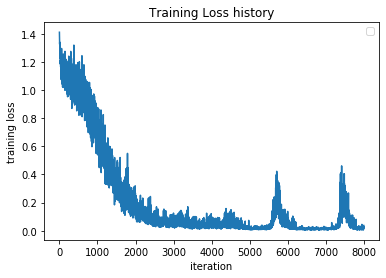

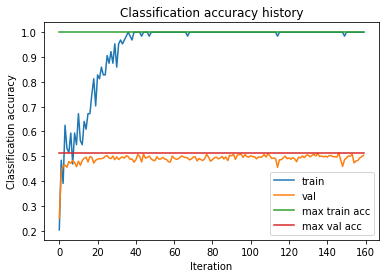

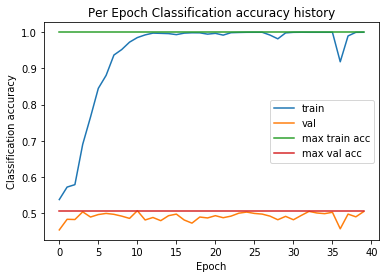

In [62]:
torch.save(best_model, "best_model_RNN_without_noise_cleanup_3sec_Time_Scale_20_epochs_WD_01")
torch.save(model, "model_RNN_without_noise_cleanup_3sec_Time_scale_20_epochs_WD_01")

##PLOT LOSS, TRAIN ACCURACY, TEST ACCURACY
import matplotlib.pyplot as plt
max_train_accuracy = np.repeat(np.max(np.array([train_accuracy_list])),   len(train_accuracy_list))

max_test_accuracy = np.repeat(np.max(np.array([test_accuracy_list])),   len(test_accuracy_list))

max_p_e_train_accuracy = np.repeat(np.max(np.array([per_epoch_train_accuracy_list])),   len(per_epoch_train_accuracy_list))

max_p_e_test_accuracy = np.repeat(np.max(np.array([per_epoch_test_accuracy_list])),   len(per_epoch_test_accuracy_list))

# plot the loss history
plt.subplot()
plt.plot(loss_list)
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.legend()
plt.show()

plt.subplot()
plt.plot(train_accuracy_list, label='train')
plt.plot(test_accuracy_list, label='val')
plt.plot(max_train_accuracy, label='max train acc')
plt.plot(max_test_accuracy, label='max val acc')
plt.title('Classification accuracy history')
plt.xlabel('Iteration')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

plt.subplot()
plt.plot(per_epoch_train_accuracy_list, label='train')
plt.plot(per_epoch_test_accuracy_list, label='val')
plt.plot(max_p_e_train_accuracy, label='max train acc')
plt.plot(max_p_e_test_accuracy, label='max val acc')
plt.title('Per Epoch Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()



from sklearn.metrics import confusion_matrix
#from resources.plotcm import plot_confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    #plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
def check_train_accuracy1(loader, model, for_confusion_matrix=0):
    #if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    #else:
    #    print('Checking accuracy on test set')
    print('Checking accuracy on TRAIN set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    true_label_list = []
    predicted_label_list = []
    with torch.no_grad():
        for da in loader:
            x = da['image']
            y = da['emotion']
            y = y.reshape(y.shape[0])
            x = x.to(device)
            y = y.to(device)
            #pdb.set_trace()
            true_label_list.append(y.cpu().data.numpy())
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            #pdb.set_trace()
            #y = torch.stack(y) #.to(device=device)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            _, preds = scores.max(1)
            predicted_label_list.append(preds.cpu().data.numpy())            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        if for_confusion_matrix == 1:
          return acc, true_label_list, predicted_label_list
        else:
          return acc
    
    


Checking accuracy on TRAIN set


/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/wor

Got 12795 / 12800 correct (99.96)
Confusion matrix, without normalization
[[3200    0    0    0]
 [   0 3200    0    0]
 [   0    0 3199    1]
 [   0    3    1 3196]]


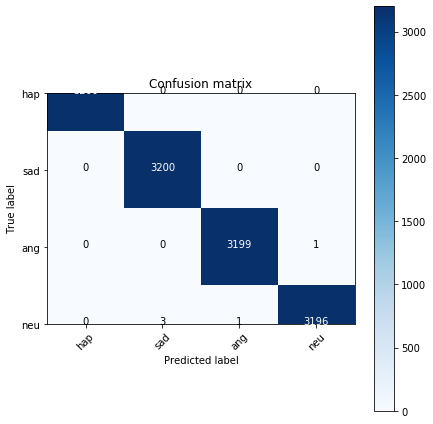

In [63]:
#best_model1 = torch.load("model2")
accuracy, true_label, predicted_label = check_train_accuracy1(loader_train, best_model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)

emotion_dict = ('hap',
                'sad',
                'ang',
                'neu'
                )
cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm, emotion_dict)

Checking accuracy on TRAIN set


/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/ATen/native/cudnn/RNN.cpp:1266: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters().
/opt/conda/conda-bld/pytorch_1579022060824/wor

Got 823 / 1600 correct (51.44)
Confusion matrix, without normalization
[[ 24 123  79 174]
 [  4 286  38  72]
 [  6  22 286  86]
 [  5 110  58 227]]


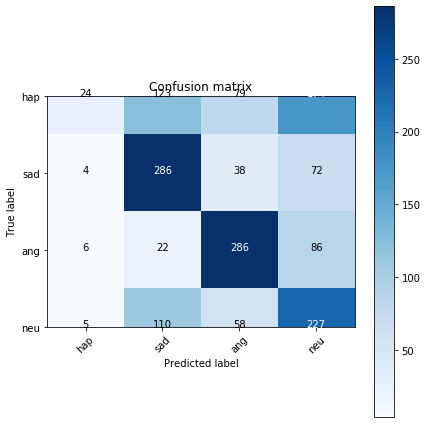

In [64]:
#best_model1 = torch.load("model1")
accuracy, true_label, predicted_label = check_train_accuracy1(loader_val, best_model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)


cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm, emotion_dict)

Checking accuracy on TRAIN set
Got 12799 / 12800 correct (99.99)
Confusion matrix, without normalization
[[3200    0    0    0]
 [   0 3200    0    0]
 [   0    0 3200    0]
 [   0    0    1 3199]]


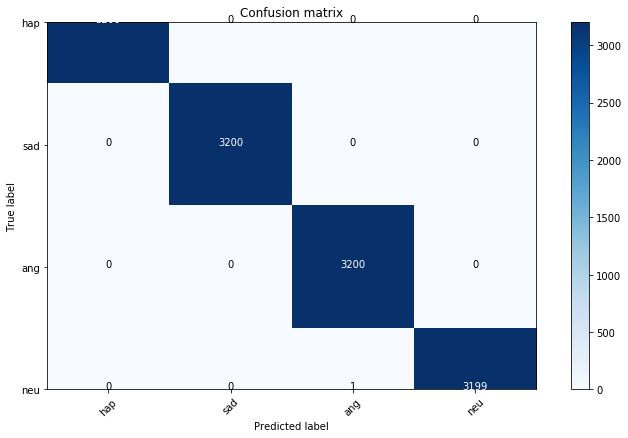

In [65]:
accuracy, true_label, predicted_label = check_train_accuracy1(loader_train, model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)

emotion_dict = ('hap',
                'sad',
                'ang',
                'neu'
                )
cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(10,6))
plot_confusion_matrix(cm, emotion_dict)

Checking accuracy on TRAIN set
Got 806 / 1600 correct (50.38)
Confusion matrix, without normalization
[[ 24 101  70 205]
 [  3 260  30 107]
 [  7  19 271 103]
 [  4  92  53 251]]


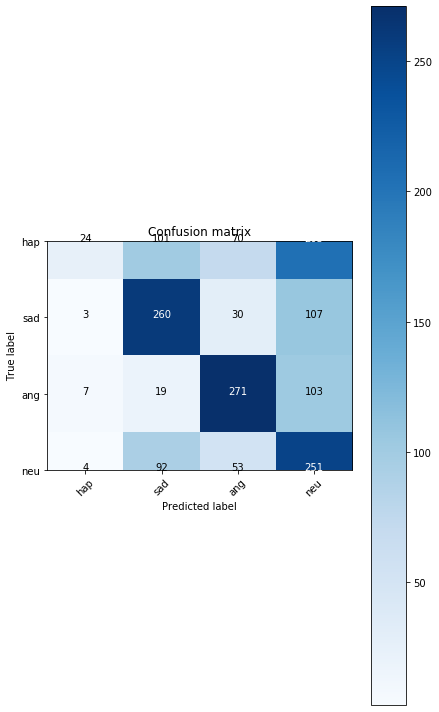

In [66]:
#best_model1 = torch.load("model1")
accuracy, true_label, predicted_label = check_train_accuracy1(loader_val, model, for_confusion_matrix=1)
true_label = np.concatenate(true_label, axis=None)
#print(true_label)

predicted_label = np.concatenate(predicted_label, axis=None)
#print(predicted_label)


cm = confusion_matrix(true_label, predicted_label)

#t_t = train_set_targets.cpu().data.numpy()
#predict = preds.cpu().data.numpy()
#t_t = 1 + t_t
#predict = 1 + predict

#for i in range(t_t.shape[0]):
#  print(t_t[i], predict[i])
#print(t_t)
#print(predict)
#print(cm)
plt.figure(figsize=(6,10))
plot_confusion_matrix(cm, emotion_dict)